<H3>Gathering Data</H3>

In [1]:
# Import all the required libraries
# Note that it is much easier to use the Tweepy library installed on Udacity,
# instead of visiting the Tweepy website and downloading/installing the
# package into your own Jupyter notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import re
import datetime as dt

%matplotlib inline

In [2]:
# Download the Twitter feed for WeRateDogs directly from the website
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Scrape the image predictions file from the Udacity website and
# load the contents into the imagepredictions dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Verify that the image_predictions.tsv contents have been loaded into the
# image_predictions dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Using the commands from the Tweepy library to set up the Twitter API
# Note that Udacity has the fully functional version of Tweepy; installing
# Tweepy into Jupyter notebooks on other websites will cause a lot of
# problems and frustration!

# NOTE:  For consumer_key, consumer_secret, access_token, access_secret,
# you have to obtain a developer account on Twitter, which will guide you
# through the process on obtaining such an account.  The keys are randomly
# generated and will consist of a string of alphanumeric characters.  This
# is required in order to generate the tweet_json.txt file

consumer_key = 'XXXX XXXX XXXX XXXX'
consumer_secret = 'XXXX XXXX XXXX XXXX'
access_token = 'XXXX XXXX XXXX XXXX'
access_secret = 'XXXX XXXX XXXX XXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [6]:
# Creating the tweet_json.txt file.

# NOTE:  Let this cell run for the entire duration, so that the file
# can be created.  There will be instances where it times out, but
# it is best not to interrupt the process.

# We should obtain a tweet_json.txt file that's approximately 10 MB 

with open('tweet_json.txt', mode='w', encoding='utf8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 735


In [7]:
# Read the tweet_json.txt file and append each tweet into the 
# tweet_data
tweet_data = []
tweet_json_text_file = open('tweet_json.txt', mode='r')

for line in tweet_json_text_file:
    try:
        tweet = json.loads(line)
        tweet_data.append(tweet)
    except:
        continue

tweet_json_text_file.close()

In [8]:
# Create dataframe for tweet information
tweet_info = pd.DataFrame()

# Add variables to dataframe: tweet ID, retweet count, favorite count
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_data))

# Gather the info from the dataframe to ensure all entries
# have been processed
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<H3>Assessing Data</H3>

In [9]:
# Listing our data types and relevant information from our twitter_archive
# dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Use the describe() function to obtain more details about our data, including
# mean, min, max, and standard values
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Printing out sample data from our Twitter dataframe
twitter_archive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,None,None,None,None
2126,670338931251150849,NaN,NaN,2015-11-27 20:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None


In [12]:
# This section lists the sources where users tweeted their posts from.
# The majority of users posted using the Twitter app for iPhone
# while others posted using Tweetdeck (which Twitter now owns), the
# Twitter Web Client, and Vine (which is discontinued as of 2019)

# Most surprising is that Twitter for Android was not one of the clients
# used to post to WeRateDogs

twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
# Obtain the values for rating_numerator
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# Obtain the values for the rating_denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# Print out those columns in the twitter_archive that are either null
# or duplicate values
print(twitter_archive[twitter_archive.tweet_id.isnull()])
print(twitter_archive[twitter_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [16]:
# Get the names in the twitter_archive
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Bailey         7
Toby           7
Daisy          7
an             7
Rusty          6
Jax            6
Dave           6
Oscar          6
Leo            6
Milo           6
Koda           6
Jack           6
Bella          6
Stanley        6
Scout          6
Chester        5
            ... 
Yoda           1
Ralphé         1
Rumpole        1
Jay            1
Livvie         1
Mac            1
Blu            1
Harlso         1
Marty          1
Frönq          1
Rhino          1
Humphrey       1
Alf            1
Mya            1
Pubert         1
Dallas         1
Sparky         1
Tedrick        1
Bobby          1
Karma          1
Brutus         1
Cermet         1
Acro           1
Stewie         1
Reptar         1
Rolf           1
Shnuggles      1
Mosby         

In [17]:
# Listing our data types and relevant information from our tweet_info
# dataframe
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
# Use the describe() function to obtain more details about our data, including
# mean, min, max, and standard values
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2707.918061,7571.705706
std,6.823170e+16,4579.327901,11751.915423
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,548.000000,1320.500000
50%,7.182469e+17,1269.000000,3293.000000
75%,7.986692e+17,3146.500000,9268.500000
max,8.924206e+17,77938.000000,156415.000000


In [19]:
# Listing our data types and relevant information from our image_predictions
# dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Use the describe() function to obtain more details about our data, including
# mean, min, max, and standard values
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<h3>Cleaning data</h3>

In [21]:
# Create copies of original dataframes
twitter_archive_clean = twitter_archive.copy()
tweet_info_clean = tweet_info.copy()
image_predictions_clean = image_predictions.copy()

In [22]:
# Listing our data types and relevant information from the copy of our
# twitter_archive_clean dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
# Fix missing data in twitter_archive_clean
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index, inplace=True)

In [24]:
# Fix more data in twitter_archive_clean, get rid of unnecessary columns
# that start with "retweeted_status" and "in_reply_to"
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [25]:
# Our twitter_archive_clean dataframe should look a lot cleaner now
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [26]:
# Replace empty entries with a blank
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [27]:
# Combine doggo, floofer, pupper, puppo into one category.  We'll call it
# dog_category
twitter_archive_clean['dog_category'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.dog_category.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_category, dtype: int64

In [28]:
# Rename values in dog_category column
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'pupper', 'dog_category'] = 'Pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'doggo', 'dog_category'] = 'Doggo'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'puppo', 'dog_category'] = 'Puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'doggopupper', 'dog_category'] = 'Doggo, Pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'floofer', 'dog_category'] = 'Floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'doggopuppo', 'dog_category'] = 'Doggo, Puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_category == 'doggofloofer', 'dog_category'] = 'Doggo, Floofer'

# Replace blank cells with NaNs
twitter_archive_clean.loc[twitter_archive_clean.dog_category == '', 'dog_category'] = np.nan

# Replace NaNs with text so we have non-null values
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.fillna('Unknown')

# Use value_counts() to get the details
twitter_archive_clean.dog_category.value_counts()

Unknown           1831
Pupper             224
Doggo               75
Puppo               24
Doggo, Pupper       10
Floofer              9
Doggo, Floofer       1
Doggo, Puppo         1
Name: dog_category, dtype: int64

In [29]:
# Drop the original dog categories, now that we have combined them into one
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [30]:
# Check the details of the twitter_archive_clean dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_category          2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


In [31]:
# Check that dog_category
twitter_archive_clean.dog_category.sample(8)

810     Unknown
776      Pupper
1356    Unknown
883     Unknown
1786    Unknown
1813    Unknown
123     Unknown
2266    Unknown
Name: dog_category, dtype: object

In [32]:
# Removing the HTML tags in the source
source_txt = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone', '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

# Apply function
def text_source(twitter_archive_clean):
    if twitter_archive_clean['source'] in source_txt.keys():
        abbrev = source_txt[twitter_archive_clean['source']]
        return abbrev
    else:
        return twitter_archive_clean['source']

twitter_archive_clean['source'] = twitter_archive_clean.apply(text_source, axis=1)

In [33]:
# Get the details for each source/platform where users post their tweet
# messages.  We should now be able to see the sources without the HTML tags
# As previously mentioned, none of the sources listed Twitter for Android;
# also, Twitter now owns TweetDeck and Vine is discontinued as of 2019
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [34]:
# Obtain our final details for twitter_archive_clean
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_category          2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


In [35]:
# Obtain details for tweet_info_clean
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [36]:
# Combine twitter_archive_clean and tweet_info_clean into a
# new_twitter_archive, eventually this will be required for the
# twitter_archive_master.csv file
new_twitter_archive = pd.merge(twitter_archive_clean, tweet_info_clean, on='tweet_id', how = 'inner')

In [37]:
# Verify that the new_twitter_archive has the columns from both
# twitter_archive_clean and tweet_info_clean
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
tweet_id              2168 non-null int64
timestamp             2168 non-null object
source                2168 non-null object
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null int64
rating_denominator    2168 non-null int64
name                  2168 non-null object
dog_category          2168 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
dtypes: int64(5), object(6)
memory usage: 203.2+ KB


In [38]:
# Required library for date function
from datetime import date

# Convert timestamp to datetime
new_twitter_archive['timestamp'] = pd.to_datetime(new_twitter_archive['timestamp'])

# Extract datetime to new year, month, day, time columns
new_twitter_archive['year'] = new_twitter_archive['timestamp'].dt.year

# Separate year, month, day, time
new_twitter_archive['month'] = new_twitter_archive['timestamp'].dt.month
new_twitter_archive['day'] = new_twitter_archive['timestamp'].dt.day
new_twitter_archive['time'] = new_twitter_archive['timestamp'].dt.time

# Create day of week column
new_twitter_archive['weekday'] = new_twitter_archive['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

In [39]:
# Verify that the twitter_archive_master has the new datetime format
# and columns for days of the week
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 16 columns):
tweet_id              2168 non-null int64
timestamp             2168 non-null datetime64[ns]
source                2168 non-null object
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null int64
rating_denominator    2168 non-null int64
name                  2168 non-null object
dog_category          2168 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
year                  2168 non-null int64
month                 2168 non-null int64
day                   2168 non-null int64
time                  2168 non-null object
weekday               2168 non-null int64
dtypes: datetime64[ns](1), int64(9), object(6)
memory usage: 287.9+ KB


In [40]:
new_twitter_archive['weekday'].value_counts()

0    357
1    326
2    320
4    303
3    302
5    284
6    276
Name: weekday, dtype: int64

In [41]:
# Convert p1_dog, p2_dog, p3_dog to an integer (True=1, False=0)
dog_predictions = ['p1_dog', 'p2_dog', 'p3_dog']

for p in dog_predictions:
    image_predictions_clean[p] = image_predictions_clean[p].astype(int)

# Create a new column that adds the total number of True and False for
# the 3 predictions
image_predictions_clean['dog_prediction'] = image_predictions_clean.p1_dog + image_predictions_clean.p2_dog + image_predictions_clean.p3_dog

# Replace the number with a string identifying if it's a dog (Yes),
# probably a dog (Maybe), or not a dog (No)
image_predictions_clean['dog_prediction'] = image_predictions_clean['dog_prediction'].replace(3, 'Dog')
image_predictions_clean['dog_prediction'] = image_predictions_clean['dog_prediction'].replace(2, 'Maybe a dog')
image_predictions_clean['dog_prediction'] = image_predictions_clean['dog_prediction'].replace(1, 'Maybe a dog')
image_predictions_clean['dog_prediction'] = image_predictions_clean['dog_prediction'].replace(0, 'Not a dog')

In [42]:
image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog', 'dog_prediction']].sample(8)

,p1_dog,p2_dog,p3_dog,dog_prediction
441,1,1,1,Dog
996,0,1,1,Maybe a dog
1876,1,1,0,Maybe a dog
1669,1,1,1,Dog
721,1,1,1,Dog
738,0,0,1,Maybe a dog
306,1,1,1,Dog
1542,1,1,1,Dog


In [43]:
image_predictions_clean.dog_prediction.value_counts()

Dog            1243
Maybe a dog     508
Not a dog       324
Name: dog_prediction, dtype: int64

In [44]:
image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog', 'img_num'], axis=1, inplace=True)

In [45]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
p1                2075 non-null object
p1_conf           2075 non-null float64
p2                2075 non-null object
p2_conf           2075 non-null float64
p3                2075 non-null object
p3_conf           2075 non-null float64
dog_prediction    2075 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 146.0+ KB


In [46]:
new_twitter_archive = pd.merge(new_twitter_archive, image_predictions_clean, on='tweet_id')

In [47]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
dog_category          1987 non-null object
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
year                  1987 non-null int64
month                 1987 non-null int64
day                   1987 non-null int64
time                  1987 non-null object
weekday               1987 non-null int64
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p2                    1987 non-null object
p2_conf               1987 non-nu

In [48]:
# Print out a summary showing how many are dogs, maybe a dog, or not a dog
new_twitter_archive.dog_prediction.value_counts()

Dog            1196
Maybe a dog     483
Not a dog       308
Name: dog_prediction, dtype: int64

In [49]:
# Print out sample data
new_twitter_archive.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweet_count,...,time,weekday,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog_prediction
1065,702321140488925184,2016-02-24 02:36:23,Twitter for iPhone,Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,None,Unknown,1039,...,02:36:23,2,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,West_Highland_white_terrier,0.769159,Scotch_terrier,0.064369,Old_English_sheepdog,0.043763,Dog
1450,676949632774234114,2015-12-16 02:19:04,Twitter for iPhone,This is Tyrus. He's a Speckled Centennial Tico...,https://twitter.com/dog_rates/status/676949632...,8,10,Tyrus,Unknown,390,...,02:19:04,2,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,Welsh_springer_spaniel,0.206479,Saint_Bernard,0.139339,boxer,0.114606,Dog
554,776477788987613185,2016-09-15 17:48:25,Twitter for iPhone,This is Huck. He's addicted to caffeine. Hope ...,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,Pupper,2828,...,17:48:25,3,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,Labrador_retriever,0.884839,Chesapeake_Bay_retriever,0.057565,paintbrush,0.005766,Maybe a dog
1585,673700254269775872,2015-12-07 03:07:12,Twitter for iPhone,Large blue dog here. Cool shades. Flipping us ...,https://twitter.com/dog_rates/status/673700254...,3,10,None,Unknown,545,...,03:07:12,0,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,water_bottle,0.614536,ashcan,0.050911,bucket,0.037432,Not a dog
1166,693155686491000832,2016-01-29 19:36:08,Twitter for iPhone,This is Dunkin. He can only see when he's wet ...,https://twitter.com/dog_rates/status/693155686...,12,10,Dunkin,Unknown,3199,...,19:36:08,4,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,Shih-Tzu,0.697480,Lhasa,0.200151,Tibetan_terrier,0.090970,Dog
1359,680934982542561280,2015-12-27 02:15:25,Twitter for iPhone,Say hello to Sadie. She's a Tortellini Sidewin...,https://twitter.com/dog_rates/status/680934982...,10,10,Sadie,Unknown,433,...,02:15:25,6,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,Labrador_retriever,0.784398,Siberian_husky,0.055925,beagle,0.022750,Dog
1035,705223444686888960,2016-03-03 02:49:06,Twitter for iPhone,This is Bode. He's a heavy sleeper. 9/10 https...,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,Unknown,796,...,02:49:06,3,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,Egyptian_cat,0.090508,Chesapeake_Bay_retriever,0.077373,Mexican_hairless,0.049472,Maybe a dog
1779,669972011175813120,2015-11-26 20:12:29,Twitter for iPhone,Here we see really big dog cuddling smaller do...,https://twitter.com/dog_rates/status/669972011...,10,10,None,Unknown,149,...,20:12:29,3,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,teddy,0.953071,koala,0.007027,fur_coat,0.005368,Not a dog


In [50]:
# twitter_archive_master['rating_denominator'] = 10
new_twitter_archive.drop(['rating_denominator'], axis=1, inplace=True)
new_twitter_archive.rename(columns={'rating_numerator': 'rating'}, inplace=True)

In [51]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 23 columns):
tweet_id          1987 non-null int64
timestamp         1987 non-null datetime64[ns]
source            1987 non-null object
text              1987 non-null object
expanded_urls     1987 non-null object
rating            1987 non-null int64
name              1987 non-null object
dog_category      1987 non-null object
retweet_count     1987 non-null int64
favorite_count    1987 non-null int64
year              1987 non-null int64
month             1987 non-null int64
day               1987 non-null int64
time              1987 non-null object
weekday           1987 non-null int64
jpg_url           1987 non-null object
p1                1987 non-null object
p1_conf           1987 non-null float64
p2                1987 non-null object
p2_conf           1987 non-null float64
p3                1987 non-null object
p3_conf           1987 non-null float64
dog_prediction    1987 non-null 

In [52]:
# Convert non-names to "none"
new_twitter_archive['name'].str.lower()

0        phineas
1          tilly
2         archie
3          darla
4       franklin
5           none
6            jax
7           none
8           zoey
9         cassie
10          koda
11         bruno
12          none
13           ted
14        stuart
15        oliver
16           jim
17          zeke
18       ralphus
19        gerald
20       jeffrey
21          such
22        canela
23          none
24          none
25          maya
26        mingus
27         derek
28        roscoe
29       waffles
          ...   
1957       quite
1958           a
1959        none
1960        none
1961        none
1962        none
1963        none
1964          an
1965           a
1966          an
1967        none
1968        none
1969        none
1970        none
1971        none
1972        none
1973        none
1974        none
1975        none
1976         the
1977         the
1978           a
1979           a
1980          an
1981           a
1982        none
1983           a
1984          

In [53]:
wrong_name = new_twitter_archive.name.str.islower()
new_twitter_archive.loc[wrong_name, 'name'] = 'None'

# Convert names to title case
new_twitter_archive.name = new_twitter_archive.name.str.title()

In [54]:
new_twitter_archive['name'].value_counts()

None          644
Cooper         10
Charlie        10
Oliver         10
Penny           9
Lucy            9
Tucker          9
Winston         8
Sadie           8
Toby            7
Lola            7
Daisy           7
Bella           6
Jax             6
Stanley         6
Bo              6
Koda            6
Bailey          5
Scout           5
Buddy           5
Oscar           5
Dave            5
Chester         5
Milo            5
Rusty           5
Leo             5
Louis           5
Scooter         4
Clark           4
Finn            4
             ... 
Joshwa          1
Longfellow      1
Mona            1
Pupcasso        1
Barclay         1
Tedrick         1
Spark           1
Timofy          1
Rey             1
Toffee          1
Taz             1
Travis          1
Fabio           1
Goose           1
Bruno           1
Georgie         1
Godzilla        1
Keet            1
Beebop          1
Sparky          1
Oreo            1
Frönq           1
Filup           1
Rhino           1
Humphrey  

In [55]:
predictions = ['p1', 'p2', 'p3']
for p in predictions:
    new_twitter_archive[p] = new_twitter_archive[p].str.title().str.replace('_', " ")

In [56]:
new_twitter_archive[['p1', 'p2', 'p3']].sample(8)

,p1,p2,p3
1438,American Staffordshire Terrier,Staffordshire Bullterrier,Boxer
1324,English Setter,English Springer,Brittany Spaniel
1455,Hamster,Guinea Pig,Macaque
952,Goose,Gibbon,Pizza
1249,Seat Belt,Great Dane,Weimaraner
1484,West Highland White Terrier,Old English Sheepdog,Komondor
692,Swing,Labrador Retriever,Eskimo Dog
1206,Malamute,Siberian Husky,Eskimo Dog


In [57]:
confidence = ['p1_conf', 'p2_conf', 'p3_conf']
for c in confidence:
    new_twitter_archive[c] = round(new_twitter_archive[c]*100).astype(int)

In [58]:
new_twitter_archive[['p1_conf', 'p2_conf', 'p3_conf']].sample(8)

,p1_conf,p2_conf,p3_conf
1757,58,6,6
1112,88,3,1
1536,67,17,13
1342,47,14,3
841,97,2,0
247,53,25,22
1938,36,15,11
553,52,26,17


In [59]:
new_twitter_archive.dog_prediction.value_counts()

Dog            1196
Maybe a dog     483
Not a dog       308
Name: dog_prediction, dtype: int64

In [60]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 23 columns):
tweet_id          1987 non-null int64
timestamp         1987 non-null datetime64[ns]
source            1987 non-null object
text              1987 non-null object
expanded_urls     1987 non-null object
rating            1987 non-null int64
name              1987 non-null object
dog_category      1987 non-null object
retweet_count     1987 non-null int64
favorite_count    1987 non-null int64
year              1987 non-null int64
month             1987 non-null int64
day               1987 non-null int64
time              1987 non-null object
weekday           1987 non-null int64
jpg_url           1987 non-null object
p1                1987 non-null object
p1_conf           1987 non-null int64
p2                1987 non-null object
p2_conf           1987 non-null int64
p3                1987 non-null object
p3_conf           1987 non-null int64
dog_prediction    1987 non-null object

In [61]:
new_twitter_archive = new_twitter_archive[new_twitter_archive['dog_prediction'] != "Not a dog"]

In [62]:
new_twitter_archive.dog_prediction.value_counts()

Dog            1196
Maybe a dog     483
Name: dog_prediction, dtype: int64

In [63]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 1986
Data columns (total 23 columns):
tweet_id          1679 non-null int64
timestamp         1679 non-null datetime64[ns]
source            1679 non-null object
text              1679 non-null object
expanded_urls     1679 non-null object
rating            1679 non-null int64
name              1679 non-null object
dog_category      1679 non-null object
retweet_count     1679 non-null int64
favorite_count    1679 non-null int64
year              1679 non-null int64
month             1679 non-null int64
day               1679 non-null int64
time              1679 non-null object
weekday           1679 non-null int64
jpg_url           1679 non-null object
p1                1679 non-null object
p1_conf           1679 non-null int64
p2                1679 non-null object
p2_conf           1679 non-null int64
p3                1679 non-null object
p3_conf           1679 non-null int64
dog_prediction    1679 non-null object

In [64]:
new_twitter_archive.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog_prediction
921,716080869887381504,2016-04-02 01:52:38,Twitter for iPhone,Here's a super majestic doggo and a sunset 11/...,https://twitter.com/dog_rates/status/716080869...,11,None,Doggo,1892,6707,...,01:52:38,5,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,Golden Retriever,64,Chow,25,Tibetan Mastiff,7,Dog
1977,666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,None,Unknown,54,105,...,01:01:59,0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,20,Komondor,19,Soft-Coated Wheaten Terrier,8,Dog
500,786664955043049472,2016-10-13 20:28:35,Twitter for iPhone,"""Honestly Kathleen I just want more Ken Bone"" ...",https://twitter.com/dog_rates/status/786664955...,12,None,Unknown,2614,10813,...,20:28:35,3,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,Leonberg,51,Keeshond,46,Pomeranian,1,Dog
1761,670374371102445568,2015-11-27 22:51:19,Twitter for iPhone,Meet Daisy. She's rebellious. Full of teen ang...,https://twitter.com/dog_rates/status/670374371...,12,Daisy,Unknown,259,722,...,22:51:19,4,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,English Springer,97,English Setter,1,Cocker Spaniel,0,Dog
744,747594051852075008,2016-06-28 00:54:46,Twitter for iPhone,Again w the sharks guys. This week is about do...,https://twitter.com/dog_rates/status/747594051...,11,None,Unknown,1057,3690,...,00:54:46,1,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,Basenji,39,Dingo,27,Chihuahua,10,Maybe a dog
966,710283270106132480,2016-03-17 01:55:02,Twitter for iPhone,This is Gunner. He's a Figamus Newton. King of...,https://twitter.com/dog_rates/status/710283270...,11,Gunner,Unknown,517,2137,...,01:55:02,3,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,Shih-Tzu,93,Lhasa,3,Tibetan Terrier,1,Dog
1526,674805413498527744,2015-12-10 04:18:42,Twitter for iPhone,When your entire life is crumbling before you ...,https://twitter.com/dog_rates/status/674805413...,10,None,Unknown,345,839,...,04:18:42,3,https://pbs.twimg.com/ext_tw_video_thumb/67480...,English Springer,59,Cocker Spaniel,39,Welsh Springer Spaniel,1,Dog
870,726828223124897792,2016-05-01 17:38:46,Twitter for iPhone,This is Bloop. He's a Phoenician Winnebago. To...,https://twitter.com/dog_rates/status/726828223...,12,Bloop,Unknown,997,3543,...,17:38:46,6,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,Miniature Pinscher,26,Border Terrier,18,Labrador Retriever,13,Dog


In [65]:
new_twitter_archive.rename(columns={'p1': 'dog_prediction_1', 'p2': 'dog_prediction_2', 'p3': 'dog_prediction_3'}, inplace=True)

In [66]:
new_twitter_archive[['dog_prediction_1', 'dog_prediction_2', 'dog_prediction_3']].sample(8)

,dog_prediction_1,dog_prediction_2,dog_prediction_3
18,Siberian Husky,Eskimo Dog,Malamute
102,Labrador Retriever,Kuvasz,Dalmatian
230,Hyena,Chesapeake Bay Retriever,Meerkat
758,Shetland Sheepdog,Collie,Borzoi
532,Siberian Husky,Eskimo Dog,Pembroke
1229,Cardigan,Skunk,Toilet Tissue
1801,Basset,Beagle,Welsh Springer Spaniel
521,Golden Retriever,Otterhound,Clumber


In [67]:
new_twitter_archive['tweet_id'] = new_twitter_archive['tweet_id'].astype(str)

In [68]:
new_twitter_archive['tweet_id'].describe()

count                   1679
unique                  1679
top       729463711119904772
freq                       1
Name: tweet_id, dtype: object

In [69]:
new_twitter_archive['rating'] = new_twitter_archive.text.str.extract('(\d[.,]?\d+)')
new_twitter_archive['rating'].unique()

array(['13', '12', '14', '11', '10', '236', '60', '84', '24', '98', '9.75',
       '46', '100', '165', '50', '17', '2002', '2.0', '47', '20', '99',
       '80', '45', '400', '44', '31', '33', '97', '61', '143', '121',
       '260', '2015', '92', '144', '88', '85', '8.98', '1949'], dtype=object)

In [70]:
new_twitter_archive[(new_twitter_archive['rating'] == '9.75') | (new_twitter_archive['rating'] == '2.0') | (new_twitter_archive['rating'] == '8.98') | (new_twitter_archive['rating'] == '165') | (new_twitter_archive['rating'] == '260') | (new_twitter_archive['rating'] == '2015') | (new_twitter_archive['rating'] == '2002') | (new_twitter_archive['rating'] == '1949')]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
499,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,Logan,Unknown,6243,18618,...,23:23:56,3,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,47,Persian Cat,12,Chow,10,Maybe a dog
657,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,None,Unknown,2232,4822,...,01:00:57,3,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador Retriever,44,Chihuahua,11,American Staffordshire Terrier,10,Dog
713,750086836815486976,2016-07-04 22:00:12,TweetDeck,This is Spanky. He was a member of the 2002 US...,https://twitter.com/dog_rates/status/750086836...,2002,Spanky,Unknown,536,2175,...,22:00:12,0,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,Pug,98,Teddy,0,Brabancon Griffon,0,Maybe a dog
752,746818907684614144,2016-06-25 21:34:37,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,2.0,None,Unknown,1743,5327,...,21:34:37,5,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,Dingo,18,Timber Wolf,13,Ibizan Hound,10,Maybe a dog
1309,683773439333797890,2016-01-03 22:14:26,Twitter for iPhone,This is Buddy. He's gaining strength. Currentl...,https://twitter.com/dog_rates/status/683773439...,260,Buddy,Unknown,1347,3344,...,22:14:26,6,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,Miniature Pinscher,7,Labrador Retriever,6,Schipperke,5,Dog
1321,683030066213818368,2016-01-01 21:00:32,Twitter for iPhone,This is Lulu. She's contemplating all her unre...,https://twitter.com/dog_rates/status/683030066...,2015,Lulu,Unknown,736,2163,...,21:00:32,4,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,Boxer,72,Bull Mastiff,19,French Bulldog,6,Dog
1326,682662431982772225,2015-12-31 20:39:41,Twitter for iPhone,Meet Joey and Izzy. Joey only has one ear that...,https://twitter.com/dog_rates/status/682662431...,2015,Joey,Unknown,1077,3057,...,20:39:41,3,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,Beagle,41,Cardigan,26,Basset,17,Dog
1978,666057090499244032,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,8.98,None,Unknown,127,268,...,00:55:59,0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,96,Shopping Basket,1,Golden Retriever,1,Maybe a dog
1982,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,1949,None,Unknown,39,96,...,00:24:50,0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,56,Rottweiler,24,Doberman,15,Dog


In [71]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '786709082849828864', 'rating'] = 10 # replace 9.75, round up
new_twitter_archive.loc[new_twitter_archive.tweet_id == '746818907684614144', 'rating'] = 13 # replace 2.0
new_twitter_archive.loc[new_twitter_archive.tweet_id == '666057090499244032', 'rating'] = 9 # replace 8.98
new_twitter_archive.loc[new_twitter_archive.tweet_id == '683773439333797890', 'rating'] = 9 # replace 260
new_twitter_archive.loc[new_twitter_archive.tweet_id == '683030066213818368', 'rating'] = 10 # replace 2015
new_twitter_archive.loc[new_twitter_archive.tweet_id == '682662431982772225', 'rating'] = 11 # replace 2015
new_twitter_archive.loc[new_twitter_archive.tweet_id == '666049248165822465', 'rating'] = 5 # replace 1949
new_twitter_archive.loc[new_twitter_archive.tweet_id == '750086836815486976', 'rating'] = 12 # replace 2002

# replace 165 (165/150 = 11/10)
new_twitter_archive.loc[new_twitter_archive.tweet_id == '758467244762497024', 'rating'] = 11

In [72]:
new_twitter_archive[(new_twitter_archive['tweet_id'] == '786709082849828864') | (new_twitter_archive['tweet_id'] == '746818907684614144') | (new_twitter_archive['tweet_id'] == '666057090499244032') | (new_twitter_archive['tweet_id'] == '683773439333797890') | (new_twitter_archive['tweet_id'] == '683030066213818368') | (new_twitter_archive['tweet_id'] == '682662431982772225') | (new_twitter_archive['tweet_id'] == '666049248165822465') | (new_twitter_archive['tweet_id'] == '758467244762497024') | (new_twitter_archive['tweet_id'] == '750086836815486976')]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
499,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,Logan,Unknown,6243,18618,...,23:23:56,3,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,47,Persian Cat,12,Chow,10,Maybe a dog
657,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,None,Unknown,2232,4822,...,01:00:57,3,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador Retriever,44,Chihuahua,11,American Staffordshire Terrier,10,Dog
713,750086836815486976,2016-07-04 22:00:12,TweetDeck,This is Spanky. He was a member of the 2002 US...,https://twitter.com/dog_rates/status/750086836...,12,Spanky,Unknown,536,2175,...,22:00:12,0,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,Pug,98,Teddy,0,Brabancon Griffon,0,Maybe a dog
752,746818907684614144,2016-06-25 21:34:37,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,None,Unknown,1743,5327,...,21:34:37,5,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,Dingo,18,Timber Wolf,13,Ibizan Hound,10,Maybe a dog
1309,683773439333797890,2016-01-03 22:14:26,Twitter for iPhone,This is Buddy. He's gaining strength. Currentl...,https://twitter.com/dog_rates/status/683773439...,9,Buddy,Unknown,1347,3344,...,22:14:26,6,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,Miniature Pinscher,7,Labrador Retriever,6,Schipperke,5,Dog
1321,683030066213818368,2016-01-01 21:00:32,Twitter for iPhone,This is Lulu. She's contemplating all her unre...,https://twitter.com/dog_rates/status/683030066...,10,Lulu,Unknown,736,2163,...,21:00:32,4,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,Boxer,72,Bull Mastiff,19,French Bulldog,6,Dog
1326,682662431982772225,2015-12-31 20:39:41,Twitter for iPhone,Meet Joey and Izzy. Joey only has one ear that...,https://twitter.com/dog_rates/status/682662431...,11,Joey,Unknown,1077,3057,...,20:39:41,3,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,Beagle,41,Cardigan,26,Basset,17,Dog
1978,666057090499244032,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,None,Unknown,127,268,...,00:55:59,0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,96,Shopping Basket,1,Golden Retriever,1,Maybe a dog
1982,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,Unknown,39,96,...,00:24:50,0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,56,Rottweiler,24,Doberman,15,Dog


In [73]:
# Convert rating from int to float
new_twitter_archive['rating'] = new_twitter_archive['rating'].astype(float)

In [74]:
new_twitter_archive['rating'].sort_values(ascending=False).head(15)

991     400.0
191     236.0
1428    144.0
1296    143.0
1297    121.0
1815    100.0
609     100.0
940      99.0
444      98.0
1264     97.0
1419     92.0
1487     88.0
1558     85.0
319      84.0
1177     80.0
Name: rating, dtype: float64

In [75]:
new_twitter_archive[(new_twitter_archive['rating'] == 400.0) | (new_twitter_archive['rating'] == 236.0) | (new_twitter_archive['rating'] == 144.0) | (new_twitter_archive['rating'] == 143.0) | (new_twitter_archive['rating'] == 121.0) | (new_twitter_archive['rating'] == 100.0) | (new_twitter_archive['rating'] == 99.0) | (new_twitter_archive['rating'] == 98.0) | (new_twitter_archive['rating'] == 97.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
191,844979544864018432,2017-03-23 18:29:57,Twitter for iPhone,PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,236.0,None,Unknown,2533,13559,...,18:29:57,3,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,Tennis Ball,100,Racket,0,Shetland Sheepdog,0,Maybe a dog
444,796080075804475393,2016-11-08 20:00:55,Twitter for iPhone,This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,98.0,Yogi,Unknown,2375,8640,...,20:00:55,1,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,Chow,97,Tibetan Mastiff,1,Gibbon,0,Maybe a dog
609,766793450729734144,2016-08-20 00:26:19,Twitter for iPhone,This is Rufus. He just missed out on the 100m ...,https://twitter.com/dog_rates/status/766793450...,100.0,Rufus,Unknown,1370,5123,...,00:26:19,5,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,Beagle,45,Basset,20,Bloodhound,7,Dog
940,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,None,Unknown,738,2820,...,01:29:02,6,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,Golden Retriever,37,Cocker Spaniel,18,Irish Setter,9,Dog
991,708469915515297792,2016-03-12 01:49:25,Twitter for iPhone,This is Bobble. He's a Croatian Galifianakis. ...,https://twitter.com/dog_rates/status/708469915...,400.0,Bobble,Unknown,806,3084,...,01:49:25,5,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,Chihuahua,75,Toy Terrier,13,Pembroke,4,Dog
1264,686050296934563840,2016-01-10 05:01:51,Twitter for iPhone,This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,97.0,Flávio,Unknown,726,2214,...,05:01:51,6,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,Pomeranian,99,Keeshond,0,Pekinese,0,Dog
1296,684225744407494656,2016-01-05 04:11:44,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,None,Unknown,208,1225,...,04:11:44,1,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,Golden Retriever,20,Samoyed,7,Great Pyrenees,7,Dog
1297,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,None,Unknown,1369,3813,...,04:00:18,1,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,Soft-Coated Wheaten Terrier,79,Cocker Spaniel,7,Teddy,7,Maybe a dog
1428,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144.0,None,Unknown,966,3019,...,05:06:23,4,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,Teddy,66,Crib,3,Chow,3,Maybe a dog
1815,669006782128353280,2015-11-24 04:17:01,Twitter for iPhone,This is Tucker. He is 100% ready for the sport...,https://twitter.com/dog_rates/status/669006782...,100.0,Tucker,Unknown,238,558,...,04:17:01,1,https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg,Chihuahua,13,Italian Greyhound,5,Pillow,5,Maybe a dog


In [76]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '844979544864018432', 'rating'] = 13
new_twitter_archive.loc[new_twitter_archive.tweet_id == '844979544864018432', 'rating'] = 12
new_twitter_archive.loc[new_twitter_archive.tweet_id == '766793450729734144', 'rating'] = 10
new_twitter_archive.loc[new_twitter_archive.tweet_id == '713900603437621249', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '708469915515297792', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '686050296934563840', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '684225744407494656', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '684222868335505415', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '677716515794329600', 'rating'] = 12
new_twitter_archive.loc[new_twitter_archive.tweet_id == '669006782128353280', 'rating'] = 12

In [77]:
new_twitter_archive['rating'].sort_values(ascending=False).head(8)

444     98.0
1419    92.0
1487    88.0
1558    85.0
319     84.0
964     80.0
1177    80.0
1273    61.0
Name: rating, dtype: float64

In [78]:
new_twitter_archive[(new_twitter_archive['rating'] == 98.0) | (new_twitter_archive['rating'] == 92.0) | (new_twitter_archive['rating'] == 88.0) | (new_twitter_archive['rating'] == 85.0) | (new_twitter_archive['rating'] == 84.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
319,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,None,Unknown,3282,12385,...,17:52:40,6,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West Highland White Terrier,87,Kuvasz,6,Samoyed,4,Dog
444,796080075804475393,2016-11-08 20:00:55,Twitter for iPhone,This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,98.0,Yogi,Unknown,2375,8640,...,20:00:55,1,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,Chow,97,Tibetan Mastiff,1,Gibbon,0,Maybe a dog
1419,678389028614488064,2015-12-20 01:38:42,Twitter for iPhone,This is Bella. She just learned that her final...,https://twitter.com/dog_rates/status/678389028...,92.0,Bella,Pupper,418,1858,...,01:38:42,6,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,Miniature Pinscher,52,Kelpie,23,Vizsla,10,Dog
1487,675853064436391936,2015-12-13 01:41:41,Twitter for iPhone,Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,None,Unknown,1262,2639,...,01:41:41,6,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,Labrador Retriever,87,Golden Retriever,4,Vizsla,3,Dog
1558,674269164442398721,2015-12-08 16:47:50,Twitter for iPhone,This is Bob. He's a Juniper Fitzsimmons. His b...,https://twitter.com/dog_rates/status/674269164...,85.0,Bob,Unknown,222,883,...,16:47:50,1,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,Pug,62,Norwegian Elkhound,5,Cardigan,2,Dog


In [79]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '820690176645140481', 'rating'] = 12
new_twitter_archive.loc[new_twitter_archive.tweet_id == '796080075804475393', 'rating'] = 12
new_twitter_archive.loc[new_twitter_archive.tweet_id == '678389028614488064', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '675853064436391936', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '674269164442398721', 'rating'] = 8

In [80]:
new_twitter_archive['rating'].sort_values(ascending=False).head(8)

964     80.0
1177    80.0
1273    61.0
197     60.0
1048    60.0
1439    60.0
919     50.0
660     50.0
Name: rating, dtype: float64

In [81]:
new_twitter_archive[(new_twitter_archive['rating'] == 80.0) | (new_twitter_archive['rating'] == 80.0) | (new_twitter_archive['rating'] == 61.0) | (new_twitter_archive['rating'] == 60.0) | (new_twitter_archive['rating'] == 60.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
197,843235543001513987,2017-03-18 22:59:54,Twitter for iPhone,This is Tycho. She just had new wheels install...,https://twitter.com/dog_rates/status/843235543...,60.0,Tycho,Unknown,5984,21425,...,22:59:54,5,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,Pembroke,96,Cardigan,2,Chihuahua,1,Dog
964,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,None,Unknown,555,2305,...,02:46:49,4,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,Soft-Coated Wheaten Terrier,95,Dandie Dinmont,2,Cairn,2,Dog
1048,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,None,Unknown,911,2917,...,21:25:30,6,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,Great Pyrenees,67,Kuvasz,23,Golden Retriever,4,Dog
1177,692530551048294401,2016-01-28 02:12:04,Twitter for iPhone,Say hello to Cody. He's been to like 80 countr...,https://twitter.com/dog_rates/status/692530551...,80.0,Cody,Unknown,413,1824,...,02:12:04,3,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,Siberian Husky,49,Eskimo Dog,45,White Wolf,4,Maybe a dog
1273,685641971164143616,2016-01-09 01:59:19,Twitter for iPhone,This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,61.0,Otis,Pupper,778,2934,...,01:59:19,5,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,Lakeland Terrier,25,Airedale,21,Three-Toed Sloth,8,Maybe a dog
1439,677530072887205888,2015-12-17 16:45:31,Twitter for iPhone,Say hello to Axel. He's a Black Chevy Pinot on...,https://twitter.com/dog_rates/status/677530072...,60.0,Axel,Unknown,224,1051,...,16:45:31,3,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,Staffordshire Bullterrier,69,Norwegian Elkhound,3,American Staffordshire Terrier,2,Dog


In [82]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '843235543001513987', 'rating'] = 13
new_twitter_archive.loc[new_twitter_archive.tweet_id == '710658690886586372', 'rating'] = 10
new_twitter_archive.loc[new_twitter_archive.tweet_id == '704054845121142784', 'rating'] = 12
new_twitter_archive.loc[new_twitter_archive.tweet_id == '692530551048294401', 'rating'] = 10
new_twitter_archive.loc[new_twitter_archive.tweet_id == '685641971164143616', 'rating'] = 7
new_twitter_archive.loc[new_twitter_archive.tweet_id == '677530072887205888', 'rating'] = 9

In [83]:
new_twitter_archive['rating'].sort_values(ascending=False).head(8)

919     50.0
660     50.0
830     47.0
528     46.0
982     45.0
1124    44.0
1216    33.0
1136    31.0
Name: rating, dtype: float64

In [84]:
new_twitter_archive[(new_twitter_archive['rating'] == 50.0) | (new_twitter_archive['rating'] == 50.0) | (new_twitter_archive['rating'] == 47.0) | (new_twitter_archive['rating'] == 46.0) | (new_twitter_archive['rating'] == 45.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
528,781251288990355457,2016-09-28 21:56:36,Twitter for iPhone,This is Oakley. He just got yelled at for goin...,https://twitter.com/dog_rates/status/781251288...,46.0,Oakley,Unknown,2117,8566,...,21:56:36,2,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,Mexican Hairless,89,Italian Greyhound,3,Seat Belt,3,Maybe a dog
660,758041019896193024,2016-07-26 20:47:17,Twitter for iPhone,Teagan reads entire books in store so they're ...,https://twitter.com/dog_rates/status/758041019...,50.0,None,Unknown,378,2724,...,20:47:17,1,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,Bookshop,79,Cardigan,5,Bernese Mountain Dog,3,Maybe a dog
830,734776360183431168,2016-05-23 16:01:50,Twitter for iPhone,This is Livvie. Someone should tell her it's b...,https://twitter.com/dog_rates/status/734776360...,47.0,Livvie,Unknown,541,2489,...,16:01:50,0,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,Siberian Husky,30,Eskimo Dog,16,Malamute,5,Dog
919,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,Bluebert,Unknown,207,2363,...,01:36:11,6,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian Husky,40,Malamute,32,Eskimo Dog,27,Dog
982,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,None,Unknown,639,2417,...,02:04:08,0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,Borzoi,49,Wire-Haired Fox Terrier,8,English Setter,8,Dog


In [85]:
new_twitter_archive[(new_twitter_archive['rating'] == 50.0) | (new_twitter_archive['rating'] == 50.0) | (new_twitter_archive['rating'] == 47.0) | (new_twitter_archive['rating'] == 46.0) | (new_twitter_archive['rating'] == 45.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
528,781251288990355457,2016-09-28 21:56:36,Twitter for iPhone,This is Oakley. He just got yelled at for goin...,https://twitter.com/dog_rates/status/781251288...,46.0,Oakley,Unknown,2117,8566,...,21:56:36,2,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,Mexican Hairless,89,Italian Greyhound,3,Seat Belt,3,Maybe a dog
660,758041019896193024,2016-07-26 20:47:17,Twitter for iPhone,Teagan reads entire books in store so they're ...,https://twitter.com/dog_rates/status/758041019...,50.0,None,Unknown,378,2724,...,20:47:17,1,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,Bookshop,79,Cardigan,5,Bernese Mountain Dog,3,Maybe a dog
830,734776360183431168,2016-05-23 16:01:50,Twitter for iPhone,This is Livvie. Someone should tell her it's b...,https://twitter.com/dog_rates/status/734776360...,47.0,Livvie,Unknown,541,2489,...,16:01:50,0,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,Siberian Husky,30,Eskimo Dog,16,Malamute,5,Dog
919,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,Bluebert,Unknown,207,2363,...,01:36:11,6,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian Husky,40,Malamute,32,Eskimo Dog,27,Dog
982,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,None,Unknown,639,2417,...,02:04:08,0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,Borzoi,49,Wire-Haired Fox Terrier,8,English Setter,8,Dog


In [86]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '781251288990355457', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '758041019896193024', 'rating'] = 9
new_twitter_archive.loc[new_twitter_archive.tweet_id == '734776360183431168', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '716439118184652801', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '709198395643068416', 'rating'] = 9

In [87]:
new_twitter_archive['rating'].sort_values(ascending=False).head(5)

1124    44.0
1216    33.0
1136    31.0
381     24.0
885     20.0
Name: rating, dtype: float64

In [88]:
new_twitter_archive[(new_twitter_archive['rating'] == 44.0) | (new_twitter_archive['rating'] == 33.0) | (new_twitter_archive['rating'] == 31.0) | (new_twitter_archive['rating'] == 24.0) | (new_twitter_archive['rating'] == 20.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
381,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,Sam,Unknown,1470,5448,...,23:06:23,0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,Golden Retriever,87,Tibetan Mastiff,4,Labrador Retriever,3,Dog
885,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,20.0,None,Unknown,1550,4075,...,02:25:47,3,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great Dane,25,Greater Swiss Mountain Dog,13,Weimaraner,9,Dog
1124,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,None,Unknown,1396,3417,...,16:51:59,2,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador Retriever,100,Golden Retriever,0,Pug,0,Dog
1136,696405997980676096,2016-02-07 18:51:43,Twitter for iPhone,This is Berb. He just found out that they have...,https://twitter.com/dog_rates/status/696405997...,31.0,Berb,Unknown,1151,3198,...,18:51:43,6,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,Borzoi,13,Walker Hound,9,Great Pyrenees,7,Dog
1216,689599056876867584,2016-01-20 00:03:21,Twitter for iPhone,Here we see 33 dogs posing for a picture. All ...,https://twitter.com/dog_rates/status/689599056...,33.0,None,Unknown,5506,11626,...,00:03:21,2,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,Dogsled,43,Cocker Spaniel,7,Chihuahua,7,Maybe a dog


In [89]:
new_twitter_archive = new_twitter_archive[new_twitter_archive['tweet_id'] != '810984652412424192']
new_twitter_archive[(new_twitter_archive['rating'] == 24.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction


In [90]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '722974582966214656', 'rating'] = 13
new_twitter_archive.loc[new_twitter_archive.tweet_id == '697463031882764288', 'rating'] = 11
new_twitter_archive.loc[new_twitter_archive.tweet_id == '696405997980676096', 'rating'] = 7
new_twitter_archive.loc[new_twitter_archive.tweet_id == '689599056876867584', 'rating'] = 11

In [91]:
new_twitter_archive['rating'].sort_values(ascending=False).head(5)

682    17.0
314    14.0
309    14.0
99     14.0
566    14.0
Name: rating, dtype: float64

In [92]:
new_twitter_archive[(new_twitter_archive['rating'] == 17.0) | (new_twitter_archive['rating'] == 14.0)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,...,time,weekday,jpg_url,dog_prediction_1,p1_conf,dog_prediction_2,p2_conf,dog_prediction_3,p3_conf,dog_prediction
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,Doggo,6706,29909,...,15:59:51,2,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,51,Cardigan,45,Chihuahua,3,Dog
36,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,None,Unknown,5202,25443,...,15:58:53,0,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Pembroke,99,Cardigan,0,Chihuahua,0,Dog
49,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,None,Pupper,14592,46460,...,15:32:16,6,https://pbs.twimg.com/ext_tw_video_thumb/88153...,Samoyed,28,Angora,27,Persian Cat,11,Maybe a dog
64,878057613040115712,2017-06-23 01:10:23,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14.0,Emmy,Unknown,6229,39605,...,01:10:23,4,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,French Bulldog,84,Boston Bull,8,Toy Terrier,2,Dog
99,868880397819494401,2017-05-28 17:23:24,Twitter for iPhone,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14.0,Walter,Unknown,13448,62187,...,17:23:24,6,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,Laptop,15,French Bulldog,10,Printer,8,Maybe a dog
118,863079547188785154,2017-05-12 17:12:53,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14.0,None,Unknown,1048,8415,...,17:12:53,4,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,Lakeland Terrier,28,Airedale,19,Teddy,10,Maybe a dog
145,856526610513747968,2017-04-24 15:13:52,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14.0,None,Unknown,1801,11515,...,15:13:52,0,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,Old English Sheepdog,80,Tibetan Terrier,6,Standard Poodle,4,Dog
146,856282028240666624,2017-04-23 23:01:59,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",https://twitter.com/dog_rates/status/856282028...,14.0,Cermet,Unknown,6046,26937,...,23:01:59,6,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,Chihuahua,88,Italian Greyhound,3,Cardigan,2,Dog
152,854120357044912130,2017-04-17 23:52:16,Twitter for iPhone,Sometimes you guys remind me just how impactfu...,https://twitter.com/dog_rates/status/854120357...,14.0,None,Pupper,7238,31256,...,23:52:16,0,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,Black-And-Tan Coonhound,85,Doberman,5,Bluetick,2,Dog
204,841439858740625411,2017-03-14 00:04:30,Twitter for iPhone,Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14.0,None,Unknown,3670,12633,...,00:04:30,1,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,Military Uniform,85,Labrador Retriever,5,Groenendael,2,Maybe a dog


In [93]:
new_twitter_archive.loc[new_twitter_archive.tweet_id == '754120377874386944', 'rating'] = 10

In [94]:
new_twitter_archive['rating'].value_counts()

10.0    629
12.0    425
11.0    367
13.0    226
14.0     22
9.0       5
7.0       2
5.0       1
8.0       1
Name: rating, dtype: int64

In [95]:
new_twitter_archive['rating'].astype(int)
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 1986
Data columns (total 23 columns):
tweet_id            1678 non-null object
timestamp           1678 non-null datetime64[ns]
source              1678 non-null object
text                1678 non-null object
expanded_urls       1678 non-null object
rating              1678 non-null float64
name                1678 non-null object
dog_category        1678 non-null object
retweet_count       1678 non-null int64
favorite_count      1678 non-null int64
year                1678 non-null int64
month               1678 non-null int64
day                 1678 non-null int64
time                1678 non-null object
weekday             1678 non-null int64
jpg_url             1678 non-null object
dog_prediction_1    1678 non-null object
p1_conf             1678 non-null int64
dog_prediction_2    1678 non-null object
p2_conf             1678 non-null int64
dog_prediction_3    1678 non-null object
p3_conf             1678 non-nu

In [96]:
new_twitter_archive['rating'].describe()

count    1678.000000
mean       11.171037
std         1.146385
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

In [97]:
# Create a copy of the new_twitter_archive and store it in a new dataframe
# we'll call it dog_twitter_archive
dog_twitter_archive = new_twitter_archive[new_twitter_archive['dog_prediction'] == "Dog"].copy()
dog_twitter_archive.dog_prediction.value_counts()
dog_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 1 to 1986
Data columns (total 23 columns):
tweet_id            1195 non-null object
timestamp           1195 non-null datetime64[ns]
source              1195 non-null object
text                1195 non-null object
expanded_urls       1195 non-null object
rating              1195 non-null float64
name                1195 non-null object
dog_category        1195 non-null object
retweet_count       1195 non-null int64
favorite_count      1195 non-null int64
year                1195 non-null int64
month               1195 non-null int64
day                 1195 non-null int64
time                1195 non-null object
weekday             1195 non-null int64
jpg_url             1195 non-null object
dog_prediction_1    1195 non-null object
p1_conf             1195 non-null int64
dog_prediction_2    1195 non-null object
p2_conf             1195 non-null int64
dog_prediction_3    1195 non-null object
p3_conf             1195 non-nu

In [98]:
dog_twitter_archive.drop(['year', 'month', 'day', 'time', 'dog_prediction', 'source', 'p1_conf', 'dog_prediction_2', 'p2_conf', 'dog_prediction_3', 'p3_conf', 'expanded_urls'], axis=1, inplace=True)
dog_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 1 to 1986
Data columns (total 11 columns):
tweet_id            1195 non-null object
timestamp           1195 non-null datetime64[ns]
text                1195 non-null object
rating              1195 non-null float64
name                1195 non-null object
dog_category        1195 non-null object
retweet_count       1195 non-null int64
favorite_count      1195 non-null int64
weekday             1195 non-null int64
jpg_url             1195 non-null object
dog_prediction_1    1195 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 112.0+ KB


In [99]:
dog_twitter_archive.reindex(['tweet_id', 'dog_prediction_1', 'rating', 'favorite_count', 'retweet_count', 'dog_stage', 'name', 'text', 'timestamp', 'jpg_url'], axis=1).sample(3)

,tweet_id,dog_prediction_1,rating,favorite_count,retweet_count,dog_stage,name,text,timestamp,jpg_url
276,828372645993398273,Malamute,12.0,12665,2972,NaN,Alexander,This is Alexander Hamilpup. He was one of the ...,2017-02-05 22:40:03,https://pbs.twimg.com/media/C374hb0WQAAIbQ-.jpg
1327,682638830361513985,English Springer,12.0,2067,597,NaN,None,I have no words. Just a magnificent pup. 12/10...,2015-12-31 19:05:54,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg
1321,683030066213818368,Boxer,10.0,2163,736,NaN,Lulu,This is Lulu. She's contemplating all her unre...,2016-01-01 21:00:32,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg


In [100]:
# Here is where we create the official *.csv files
new_twitter_archive.to_csv('twitter_archive_master.csv', index=False)
dog_twitter_archive.to_csv('twitter_archive_dogs.csv', index=False)

<h3>Analysis and Visualizations</h3>

In [101]:
# This displays the list of plot styles available from the matplotlib
# library
plt.style.use('ggplot')
print(plt.style.available)

['seaborn-dark-palette', 'bmh', '_classic_test', 'seaborn-poster', 'grayscale', 'seaborn-talk', 'dark_background', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-bright', 'Solarize_Light2', 'seaborn-notebook', 'seaborn-deep', 'classic', 'fivethirtyeight', 'fast', 'seaborn-ticks', 'seaborn-white', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-pastel', 'ggplot', 'seaborn-dark', 'seaborn-muted', 'seaborn']


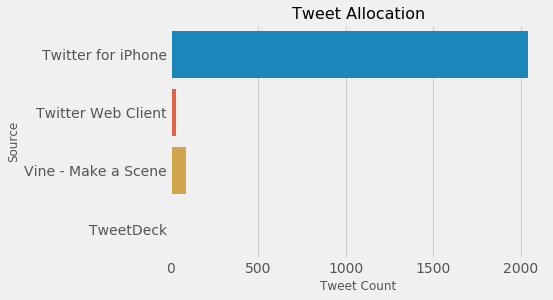

In [102]:
# Here we will display a graph showing which applications were used to
# post tweets to the WeRateDogs Twitter page.  We will use fivethirtyeight
# for this example.  The graph will display that Twitter for iPhone was
# the most commonly used application/platform
plt.style.use('fivethirtyeight')

sns.countplot(data = twitter_archive_clean, y = 'source')
plt.title('Tweet Allocation', fontsize=16)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.savefig('tweet-source.png')

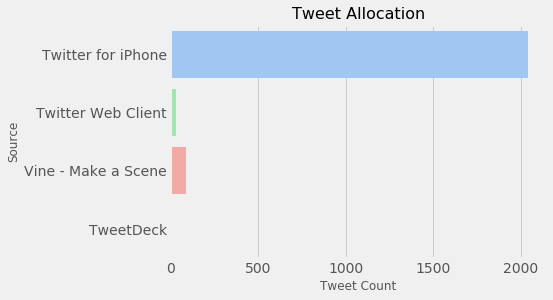

In [103]:
# This same code, now using seaborn-pastel
plt.style.use('seaborn-pastel')

sns.countplot(data = twitter_archive_clean, y = 'source')
plt.title('Tweet Allocation', fontsize=16)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.savefig('tweet-source_2.png')

In [104]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [105]:
dog_twitter_archive['rating'].value_counts()

10.0    432
12.0    308
11.0    253
13.0    179
14.0     17
9.0       3
5.0       1
8.0       1
7.0       1
Name: rating, dtype: int64

In [106]:
top_rated_dog = dog_twitter_archive.query('rating == 14')
top_rated_dog.sort_values(by=['retweet_count'], ascending=False)

,tweet_id,timestamp,text,rating,name,dog_category,retweet_count,favorite_count,weekday,jpg_url,dog_prediction_1
329,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,Bo,Doggo,37474,88192,2,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle
293,825535076884762624,2017-01-29 02:44:34,Here's a very loving and accepting puppo. Appe...,14.0,None,Puppo,17736,57425,6,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler
309,822462944365645825,2017-01-20 15:17:01,This is Gabe. He was the unequivocal embodimen...,14.0,Gabe,Pupper,14545,28424,4,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,Pomeranian
358,813812741911748608,2016-12-27 18:24:12,"Meet Gary, Carrie Fisher's dog. Idk what I can...",14.0,Gary,Unknown,14269,37099,1,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,French Bulldog
152,854120357044912130,2017-04-17 23:52:16,Sometimes you guys remind me just how impactfu...,14.0,None,Pupper,7238,31256,0,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,Black-And-Tan Coonhound
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,Cassie,Doggo,6706,29909,2,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke
64,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive r...,14.0,Emmy,Unknown,6229,39605,4,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,French Bulldog
146,856282028240666624,2017-04-23 23:01:59,"This is Cermet, Paesh, and Morple. They are ab...",14.0,Cermet,Unknown,6046,26937,6,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,Chihuahua
566,774314403806253056,2016-09-09 18:31:54,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,14.0,None,Unknown,5609,22073,4,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,Eskimo Dog
36,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",14.0,None,Unknown,5202,25443,0,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Pembroke


In [107]:
# Top favorited dogs
dog_twitter_archive.sort_values(by=['favorite_count'], ascending=False).head()

,tweet_id,timestamp,text,rating,name,dog_category,retweet_count,favorite_count,weekday,jpg_url,dog_prediction_1
305,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,None,Puppo,43895,133240,5,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier
396,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,Unknown,56819,120874,4,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua
107,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13.0,Jamesy,Pupper,33015,116578,0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French Bulldog
804,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13.0,None,Doggo,57764,115559,5,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo Dog
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13.0,Duddles,Unknown,40654,99386,0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English Springer


In [108]:
# Top retweeted dogs
dog_twitter_archive.sort_values(by=['retweet_count'], ascending=False).head()

,tweet_id,timestamp,text,rating,name,dog_category,retweet_count,favorite_count,weekday,jpg_url,dog_prediction_1
804,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13.0,None,Doggo,57764,115559,5,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo Dog
396,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,Unknown,56819,120874,4,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua
305,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,None,Puppo,43895,133240,5,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13.0,Duddles,Unknown,40654,99386,0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English Springer
329,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,Bo,Doggo,37474,88192,2,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle


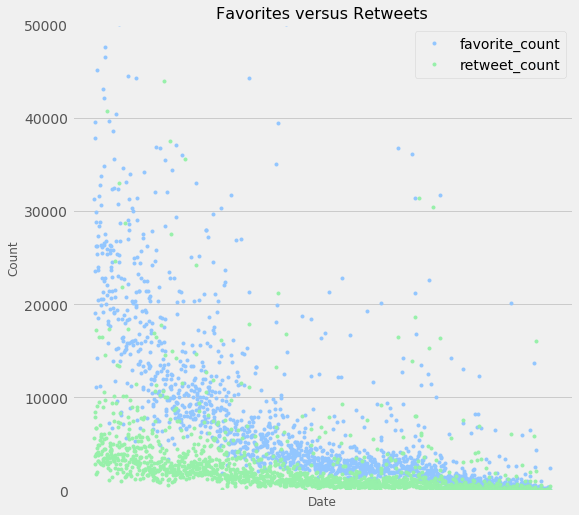

In [109]:
# Plotting favorites versus retweets.  This graph shows that favorites and
# retweets are sporadic in the beginning, but the data points converge
# over time and both decreasing
new_twitter_archive[['favorite_count', 'retweet_count']].plot(style = '.', ylim=[0, 50000], figsize=(8,8))
plt.title('Favorites versus Retweets', size=16)
plt.xlabel('Date', size=12)
plt.xticks([], [])
plt.ylabel('Count', size=12)
plt.legend(ncol=1, loc='upper right')
plt.savefig('favorites-versus-retweets.png')

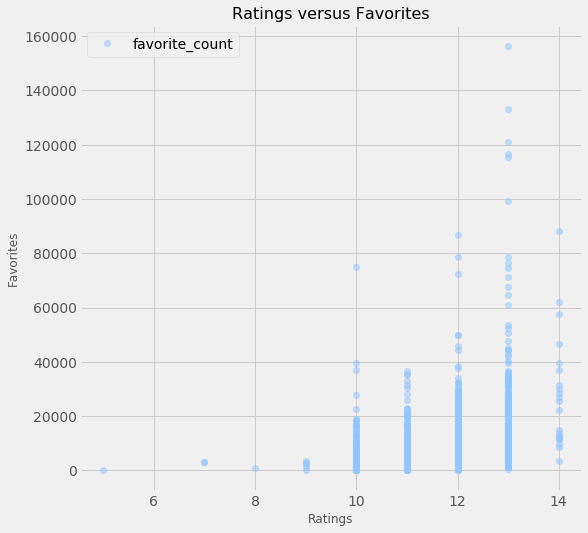

In [110]:
# This graph displays which dogs get more favorites.  As expected, the higher
# the rating, the more favorites
new_twitter_archive.plot(x = 'rating', y = 'favorite_count', style = 'o', figsize=(8,8), alpha=.5)
plt.title('Ratings versus Favorites', size=16)
plt.xlabel('Ratings', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('ratings-versus-favorites.png')

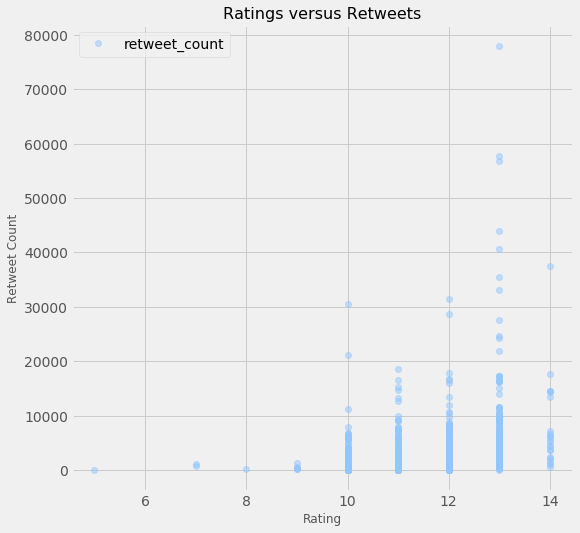

In [111]:
# This graph displays which dogs get more retweets.  As expected, the higher
# the rating, the more retweets
new_twitter_archive.plot(x = 'rating', y = 'retweet_count', style = 'o', alpha=.5, figsize=(8,8));
plt.title('Ratings versus Retweets', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Retweet Count', size=12)
plt.savefig('ratings-versus-retweets.png')

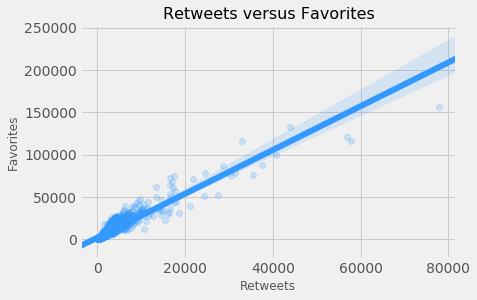

In [112]:
sns.regplot(x='retweet_count', y='favorite_count', color='#3399ff', data=new_twitter_archive, scatter_kws={'alpha':0.2})
plt.title('Retweets versus Favorites', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('retweets-versus-favorites.png')

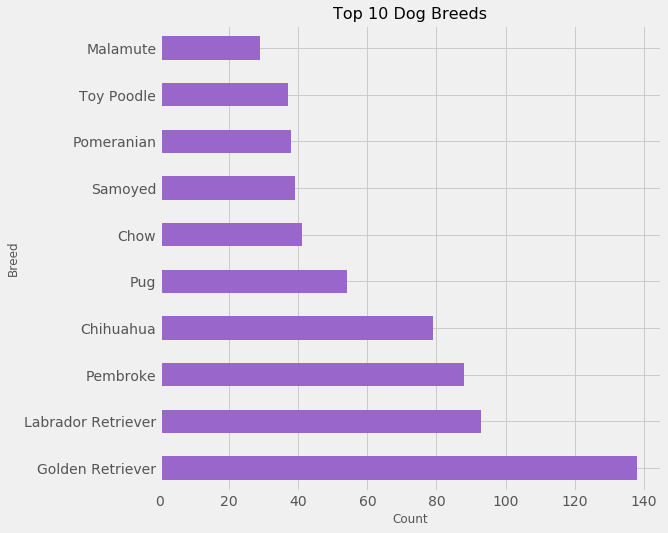

In [113]:
# Displaying the Top 10 Dog Breeds
top_breeds = new_twitter_archive.dog_prediction_1.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_breeds.plot(kind = 'barh', color=['#9966CC'], figsize=(8,8))
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Count', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

In [114]:
new_twitter_archive['dog_prediction_1'].value_counts()

Golden Retriever               138
Labrador Retriever              93
Pembroke                        88
Chihuahua                       79
Pug                             54
Chow                            41
Samoyed                         39
Pomeranian                      38
Toy Poodle                      37
Malamute                        29
Cocker Spaniel                  27
French Bulldog                  25
Chesapeake Bay Retriever        23
Miniature Pinscher              22
Seat Belt                       20
Siberian Husky                  20
German Shepherd                 20
Shetland Sheepdog               18
Maltese Dog                     18
Eskimo Dog                      18
Staffordshire Bullterrier       18
Shih-Tzu                        17
Beagle                          17
Rottweiler                      17
Cardigan                        17
Italian Greyhound               16
Kuvasz                          16
Lakeland Terrier                16
West Highland White 

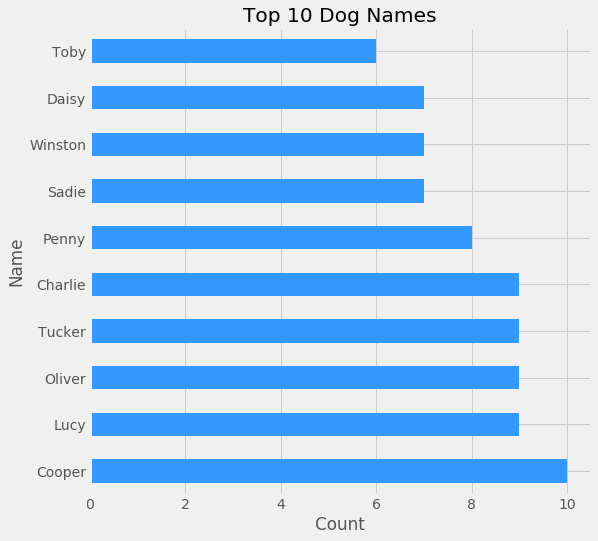

In [115]:
# Displaying the Top 10 Dog Names
top_names = new_twitter_archive.name.value_counts()[1:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh', color='#3399ff', figsize=(8,8))
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.savefig('top-names.png')

In [116]:
new_twitter_archive['name'].value_counts()

None         499
Cooper        10
Charlie        9
Tucker         9
Oliver         9
Lucy           9
Penny          8
Daisy          7
Winston        7
Sadie          7
Toby           6
Koda           6
Lola           6
Jax            6
Bella          5
Stanley        5
Oscar          5
Leo            5
Rusty          5
Bo             5
Gus            4
Winnie         4
Chester        4
Alfie          4
Scooter        4
Bailey         4
Louis          4
George         4
Bentley        4
Scout          4
            ... 
Lincoln        1
Blu            1
Mac            1
Joshwa         1
Ebby           1
Mona           1
Pubert         1
Alf            1
Monkey         1
Humphrey       1
Pipsy          1
Snoopy         1
Patch          1
Terrenth       1
Dotsy          1
Mary           1
Toffee         1
Taz            1
Travis         1
Goose          1
Bruno          1
Godzilla       1
Keet           1
Rey            1
Beebop         1
Oreo           1
Frönq          1
Filup         

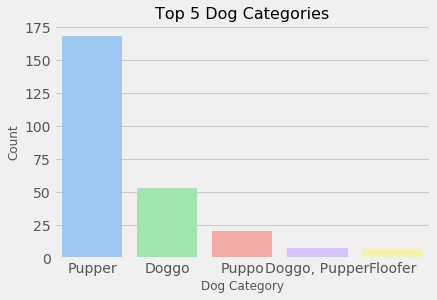

In [117]:
# Displaying the Top 5 Dog Categories
sorted_stage = new_twitter_archive['dog_category'].value_counts()[1:6].index
sns.countplot(data = new_twitter_archive, x = 'dog_category', order = sorted_stage, orient = 'h')
plt.xlabel('Dog Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 5 Dog Categories',fontsize=16)
plt.savefig('top-categories.png')

In [118]:
new_twitter_archive['dog_category'].value_counts()

Unknown           1419
Pupper             168
Doggo               53
Puppo               21
Doggo, Pupper        8
Floofer              7
Doggo, Floofer       1
Doggo, Puppo         1
Name: dog_category, dtype: int64

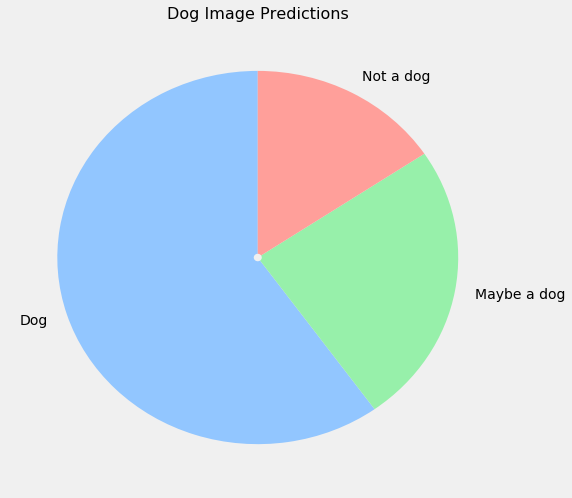

In [119]:
image_predictions_clean['dog_prediction'].value_counts().plot(kind='pie', figsize=(8,8), startangle = 90, wedgeprops = {'width': 0.98})
plt.title('Dog Image Predictions',fontsize=16);
plt.ylabel('');
plt.savefig('dog-image-predictions.png')

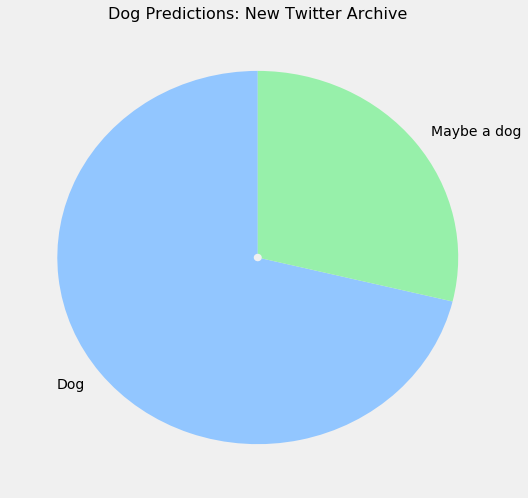

In [120]:
new_twitter_archive['dog_prediction'].value_counts().plot(kind='pie', figsize=(8,8), startangle = 90, wedgeprops = {'width': 0.98})
plt.title('Dog Predictions: New Twitter Archive',fontsize=16);
plt.ylabel('');
plt.savefig('dog-predictions-new-twitter-archive.png')